In [1]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math  

In [2]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df_merged=pd.read_csv("df_ML.csv")

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_copy2 = df_merged[['Positive','Adj Close']]

## Normalizing data
dataCopy = pd.DataFrame(scaler.fit_transform(data_copy2))
dataCopy.columns = data_copy2.columns
dataCopy.index = data_copy2.index

## Bring back the Date
dataCopy['Date'] = df_merged['Date']
dataCopy['Positive'] = df_merged['Positive']
dataCopy.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)
dataCopy

,Positive,y,ds
0,0.106,0.460175,2018-06-01
1,0.076,0.523735,2018-06-04
2,0.076,0.524923,2018-06-05
3,0.122,0.515995,2018-06-06
4,0.100,0.474178,2018-06-07
...,...,...,...
246,0.131,0.505042,2019-05-24
247,0.158,0.507226,2019-05-28
248,0.089,0.450411,2019-05-29
249,0.077,0.455197,2019-05-30


## Prophet

In [5]:
# split data frame  into two parts train and test
train_size = int(len(dataCopy) * 0.75)
df_train = dataCopy[:train_size]
df_test = dataCopy[train_size:]
print(df_train.shape)
print(df_test.shape)
df_test

(188, 3)
(63, 3)


,Positive,y,ds
188,0.085,0.551066,2019-03-04
189,0.110,0.596769,2019-03-05
190,0.086,0.583376,2019-03-06
191,0.125,0.536614,2019-03-07
192,0.143,0.533466,2019-03-08
...,...,...,...
246,0.131,0.505042,2019-05-24
247,0.158,0.507226,2019-05-28
248,0.089,0.450411,2019-05-29
249,0.077,0.455197,2019-05-30


In [6]:
dataCopy["ds"] = pd.to_datetime(dataCopy["ds"])

In [7]:
# Instantiate prophet
model = Prophet()
# fit the training data
model.fit(df_train)

15:48:56 - cmdstanpy - INFO - Chain [1] start processing
15:48:56 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
forecast = model.predict(df_test)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-04,0.431983,0.300788,0.535972,0.431983,0.431983,-0.010667,-0.010667,-0.010667,-0.010667,-0.010667,-0.010667,0.0,0.0,0.0,0.421316
1,2019-03-05,0.434820,0.336536,0.569037,0.434763,0.435011,0.015078,0.015078,0.015078,0.015078,0.015078,0.015078,0.0,0.0,0.0,0.449898
2,2019-03-06,0.437657,0.339219,0.572424,0.437225,0.438312,0.019647,0.019647,0.019647,0.019647,0.019647,0.019647,0.0,0.0,0.0,0.457304
3,2019-03-07,0.440494,0.331360,0.590866,0.439601,0.442077,0.018782,0.018782,0.018782,0.018782,0.018782,0.018782,0.0,0.0,0.0,0.459277
4,2019-03-08,0.443331,0.328488,0.570278,0.441529,0.446081,0.006443,0.006443,0.006443,0.006443,0.006443,0.006443,0.0,0.0,0.0,0.449774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019-05-24,0.661784,0.486096,0.878460,0.524657,0.832062,0.006443,0.006443,0.006443,0.006443,0.006443,0.006443,0.0,0.0,0.0,0.668227
59,2019-05-28,0.673132,0.489503,0.897219,0.532184,0.847830,0.015078,0.015078,0.015078,0.015078,0.015078,0.015078,0.0,0.0,0.0,0.688210
60,2019-05-29,0.675969,0.519965,0.933314,0.531409,0.854683,0.019647,0.019647,0.019647,0.019647,0.019647,0.019647,0.0,0.0,0.0,0.695616
61,2019-05-30,0.678806,0.508910,0.915742,0.531910,0.860472,0.018782,0.018782,0.018782,0.018782,0.018782,0.018782,0.0,0.0,0.0,0.697589


In [9]:
# Instantiate prophet
model = Prophet()
# fit the training data
model.fit(df_train)

15:48:56 - cmdstanpy - INFO - Chain [1] start processing
15:48:56 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
forecast = model.predict(df_test)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-04,0.431983,0.291916,0.543616,0.431983,0.431983,-0.010667,-0.010667,-0.010667,-0.010667,-0.010667,-0.010667,0.0,0.0,0.0,0.421316
1,2019-03-05,0.434820,0.331065,0.568970,0.434705,0.435019,0.015078,0.015078,0.015078,0.015078,0.015078,0.015078,0.0,0.0,0.0,0.449898
2,2019-03-06,0.437657,0.331456,0.567054,0.437065,0.438494,0.019647,0.019647,0.019647,0.019647,0.019647,0.019647,0.0,0.0,0.0,0.457304
3,2019-03-07,0.440494,0.342411,0.575562,0.439185,0.442121,0.018782,0.018782,0.018782,0.018782,0.018782,0.018782,0.0,0.0,0.0,0.459277
4,2019-03-08,0.443331,0.336499,0.571486,0.441281,0.446055,0.006443,0.006443,0.006443,0.006443,0.006443,0.006443,0.0,0.0,0.0,0.449774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019-05-24,0.661784,0.478707,0.862516,0.508906,0.815723,0.006443,0.006443,0.006443,0.006443,0.006443,0.006443,0.0,0.0,0.0,0.668227
59,2019-05-28,0.673132,0.490222,0.878350,0.516031,0.830418,0.015078,0.015078,0.015078,0.015078,0.015078,0.015078,0.0,0.0,0.0,0.688210
60,2019-05-29,0.675969,0.493608,0.894845,0.514171,0.836982,0.019647,0.019647,0.019647,0.019647,0.019647,0.019647,0.0,0.0,0.0,0.695616
61,2019-05-30,0.678806,0.501205,0.908826,0.512578,0.843257,0.018782,0.018782,0.018782,0.018782,0.018782,0.018782,0.0,0.0,0.0,0.697589


In [11]:
metric_df = forecast.set_index('ds')[['yhat']].join(dataCopy.set_index('ds').y).reset_index()
metric_df

,ds,yhat,y
0,2019-03-04,0.421316,0.551066
1,2019-03-05,0.449898,0.596769
2,2019-03-06,0.457304,0.583376
3,2019-03-07,0.459277,0.536614
4,2019-03-08,0.449774,0.533466
...,...,...,...
58,2019-05-24,0.668227,0.505042
59,2019-05-28,0.688210,0.507226
60,2019-05-29,0.695616,0.450411
61,2019-05-30,0.697589,0.455197


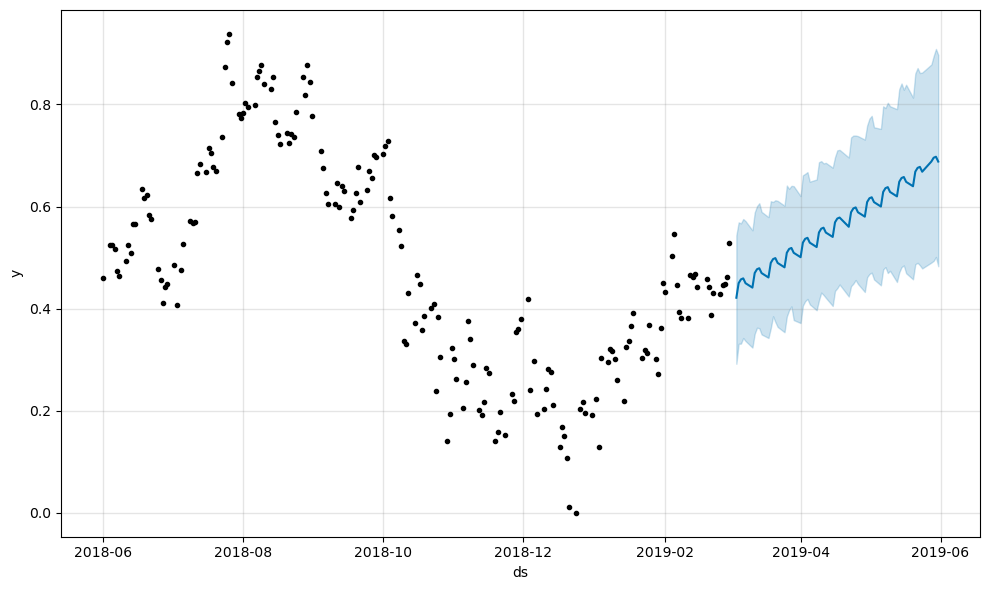

In [12]:
model.plot(forecast);

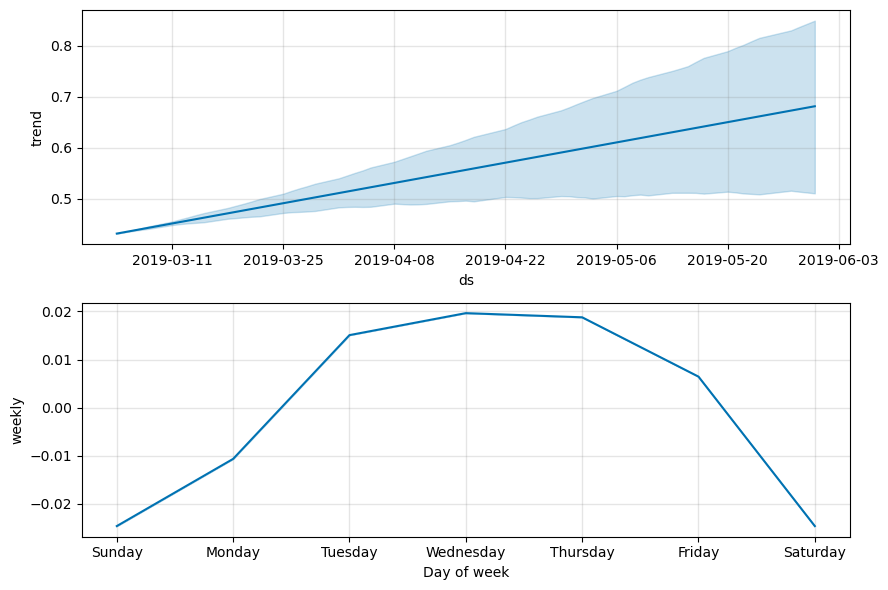

In [13]:
# plot graphs of different components:
model.plot_components(forecast);

In [14]:
# code
import math  
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

print("RMSE: ",math.sqrt(mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat'])))

Mean Squared Error (MSE): 0.03958176377667852
Mean Absolute Error (MAE): 0.1746432803891612
RMSE:  0.19895166190981797


## KNN

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


knn_copy = df_merged[['Subjectivity','Adj Close']]

## Normalizing data
knn_data = pd.DataFrame(scaler.fit_transform(knn_copy))
knn_data.columns = knn_copy.columns
knn_data.index = knn_copy.index

## Bring back the Date
knn_data['Date'] = df_merged['Date']
knn_data = knn_data[['Date','Adj Close']]
knn_data

,Date,Adj Close
0,2018-06-01,0.460175
1,2018-06-04,0.523735
2,2018-06-05,0.524923
3,2018-06-06,0.515995
4,2018-06-07,0.474178
...,...,...
246,2019-05-24,0.505042
247,2019-05-28,0.507226
248,2019-05-29,0.450411
249,2019-05-30,0.455197


Text(0, 0.5, 'Adj Close')

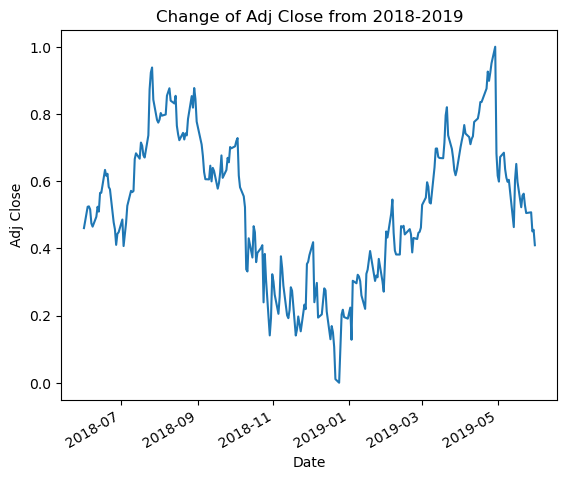

In [34]:
plt.plot(knn_data['Date'], knn_data['Adj Close']) 
plt.title('Change of Adj Close from 2018-2019')
plt.xticks(rotation=30, ha='right')

plt.xlabel('Date')
plt.ylabel('Adj Close')

In [35]:
knn_data['Date'] = pd.to_datetime(knn_data.Date,format='%Y-%m-%d')
knn_data.index = knn_data['Date']

data = knn_data.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(knn_data)),columns=['Date', 'Adj Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj Close'][i] = data['Adj Close'][i]

from fastai.tabular.all import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [36]:
pd.options.mode.chained_assignment = None  # default='warn'

new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

In [38]:
#split into train and validation
train = new_data[:200]
valid = new_data[200:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

In [39]:
#split into train and validation
train = new_data[:200]
valid = new_data[200:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

In [40]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
import math  
import sklearn.metrics 

In [41]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [42]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
mse = sklearn.metrics.mean_squared_error(np.array(y_valid), np.array(preds))  
mae = mean_absolute_error(np.array(y_valid), np.array(preds))

print("RMS: ",rms)
print("MSE: ",mse)
print("MAE: ",mae)

RMS:  0.22403401372422552
MSE:  0.05019123930538646
MAE:  0.20799311345908345


Text(0, 0.5, 'Adj Close')

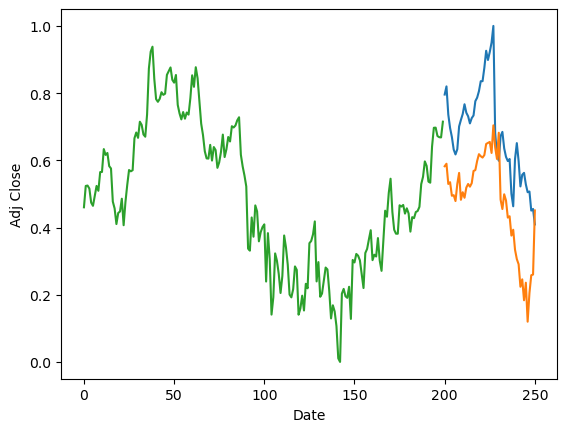

In [43]:
#plot the graph
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'])
 
plt.xlabel('Date')
plt.ylabel('Adj Close')

## Green -> Training set
## Blue -> Actual test set
## Orange -> Predicted test set